## Softmax

In [10]:
import numpy as np

In [11]:
vector = np.array([11231, 999, 123142])

In [12]:
vector = np.array([-10, 10, 24])

In [13]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)


In [14]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

In [ ]:
#直接下载

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

In [ ]:
%run /Users/zhangjie/Documents/machinelearning/att/nplAssignments/zj-Assingment-04/wikiextractor/WikiExtractor.py -b 500M -o /Users/zhangjie/Documents/machinelearning/att/nplAssignments/zj-Assingment-04/zhwiki /Users/zhangjie/Documents/machinelearning/att/nplAssignments/assignment-4/wiki_zh_20190720/zhwiki-20190720-pages-articles-multistream.xml.bz2

In [ ]:
# 1.繁体转简体
from hanziconv import HanziConv
%cd /Users/zhangjie/Documents/machinelearning/att/nplAssignments/zj-Assingment-04/zhwiki/AA
files = ['./zhwiki/AA/wiki_00', './zhwiki/AA/wiki_01', './zhwiki/AA/wiki_02]
for path in files:
    with open(path, 'r') as f:
         with open(path + '_simple', 'w') as target:
             for line in f.readlines():
                 target.write(HanziConv.toSimplified(line))

In [ ]:
# 2. 分词并且存到新文件
import jieba
files_sim = ['./zhwiki/AA/wiki_00_simple', './zhwiki/AA/wiki_01_simple', './zhwiki/AA/wiki_02_simple']
for path in files_sim:
    with open(path ,'r') as f:
        with open(path+'_cuted','w') as target:
            for line in f.readlines():
                target.write(' '.join(jieba.cut(line)))

In [ ]:
cat 'wiki_00_simple_cuted' 'wiki_01_simple_cuted' 'wiki_02_simple_cuted' > 'all_cut'

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [1]:
from gensim.models import word2vec
from gensim.models.word2vec import LineSentence


In [ ]:
%cd /Users/zhangjie/Documents/machinelearning/att/nplAssignments/zj-Assingment-04/zhwiki/AA
line_sent = LineSentence('./all_cut')
model = word2vec.Word2Vec(line_sent,size=200,min_count=5,workers=2)
model.save('./word2vec.model')

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [2]:
from gensim.models import Word2Vec
from gensim import models
%cd /Users/zhangjie/Documents/machinelearning/att/nplAssignments/assignment-4
model = models.Word2Vec.load('./word2vec.model')
one_corpus = ['图书']
result = model.most_similar(one_corpus,topn=50)
print(result)
similar_result= dict()
for res in result:
    similar_result[res[0]]=res[1]
print (similar_result)
    

/Users/zhangjie/Documents/machinelearning/att/nplAssignments/assignment-4


/anaconda3/envs/NPL/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/anaconda3/envs/NPL/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('图书资料', 0.7614538669586182), ('书目', 0.6983433961868286), ('书刊', 0.6975691318511963), ('馆藏', 0.689782977104187), ('藏书', 0.6872755289077759), ('珍本', 0.6747257709503174), ('书报', 0.6718407869338989), ('书籍', 0.6715202927589417), ('善本', 0.668911874294281), ('阅览', 0.6643094420433044), ('书库', 0.6634057760238647), ('借阅', 0.6618452072143555), ('视听资料', 0.6506288051605225), ('电子书', 0.6467940807342529), ('丛书', 0.6447407007217407), ('图书馆', 0.6433200836181641), ('特藏', 0.6399127840995789), ('资料室', 0.6375542879104614), ('读物', 0.6346639394760132), ('上海图书馆', 0.6277792453765869), ('影印', 0.6273971796035767), ('音像制品', 0.6249898672103882), ('外文', 0.6237434148788452), ('阅览室', 0.6188491582870483), ('古籍', 0.6176964640617371), ('典藏', 0.616783082485199), ('开架', 0.6107420921325684), ('出版单位', 0.6096142530441284), ('参考书', 0.6073898077011108), ('电子书籍', 0.5930932760238647), ('印刷品', 0.5868101119995117), ('图书室', 0.5824691653251648), ('藏品', 0.5822299718856812), ('印刷', 0.5816721320152283), ('编目', 0.5815670490264893), ('

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

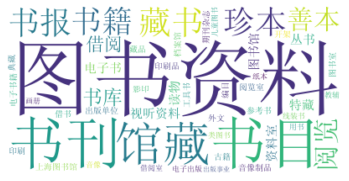

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(
    background_color="white", #背景颜色
    max_words=200, #显示最大词数
    font_path="./simsun.ttc",  #使用字体
    min_font_size=1,
    max_font_size=500, 
    width=400  #图幅宽度
    )
wc.generate_from_frequencies(similar_result)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [5]:
import jieba
%cd /Users/zhangjie/Documents/machinelearning/att/nplAssignments/zj-Assingment-04
files_demo ='./demo'
with open(files_demo,'r') as f:
    with open('./demo_cut','w') as target:
        for line in f.readlines():
            target.write(' '.join(jieba.cut(line)))
line_sent_demo = LineSentence('./demo_cut')
mode_demo = word2vec.Word2Vec(line_sent_demo,size=200,min_count=5,workers=2)
mode_demo.save('./word2vec_demo.model')


Building prefix dict from the default dictionary ...


/Users/zhangjie/Documents/machinelearning/att/nplAssignments/zj-Assingment-04


Dumping model to file cache /var/folders/hw/z_fcnbnd33x0l3cqd8lp6_t00000gn/T/jieba.cache
Loading model cost 0.958 seconds.
Prefix dict has been built succesfully.
/anaconda3/envs/NPL/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/anaconda3/envs/NPL/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/anaconda3/envs/NPL/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/envs/NPL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/NPL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 30340 missing from current font.
  font.load_char(ord(s), flags=flags)
/anaconda3/envs/NPL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/NPL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/NPL/lib/

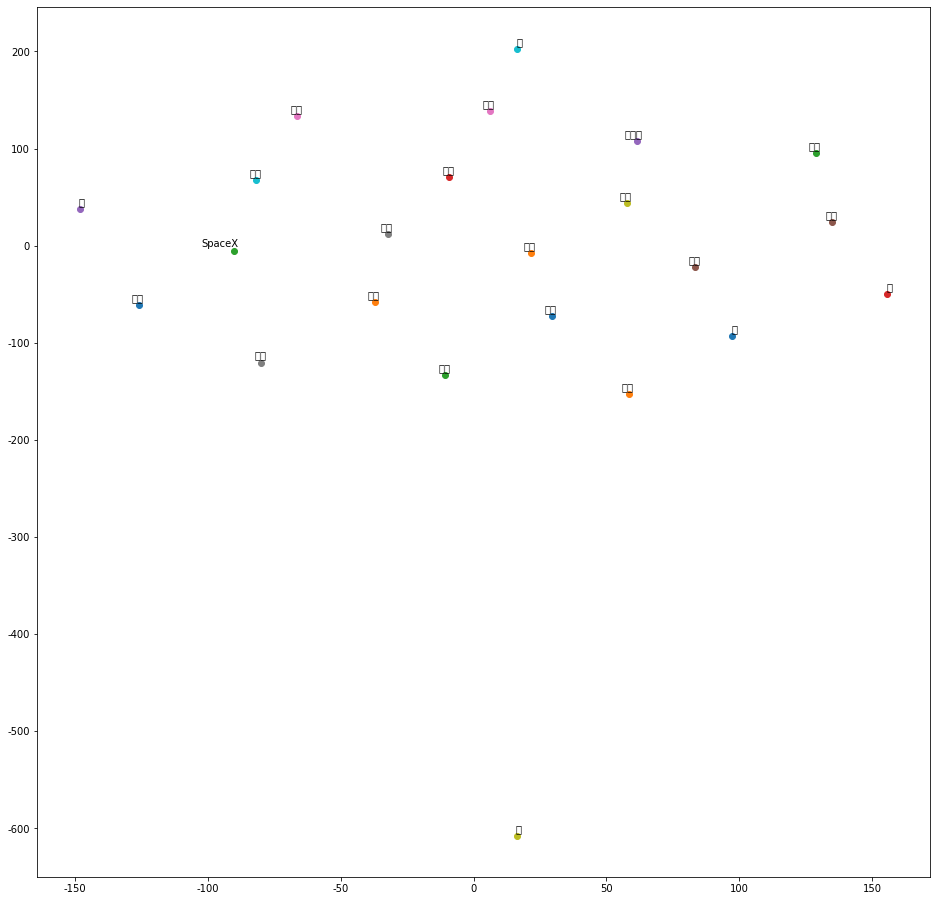

In [8]:
from pylab import mpl 
from sklearn.manifold import TSNE
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1]) 
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号   
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()
tsne_plot(mode_demo)

In [24]:
import matplotlib
matplotlib.matplotlib_fname()

'/anaconda3/envs/NPL/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'